In [758]:
import warnings
warnings.filterwarnings('ignore')

In [792]:
import pandas as pd
import numpy as np
import math
from skimpy import skim

from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

In [760]:
import matplotlib as mlp

sns.set_theme(style='darkgrid', palette='mako')

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 15

In [761]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

In [762]:
RANDOM = 42

# LOAD

In [800]:
try:
  cargotype_info = pd.read_csv('data/cargotype_info.csv', index_col='Unnamed: 0')
  carton_price = pd.read_excel('data/carton_price.xlsx')
  carton = pd.read_csv('data/carton.csv')
  data = pd.read_csv('data/data.csv', index_col='Unnamed: 0')
  sku_cargotypes = pd.read_csv('data/sku_cargotypes.csv', index_col='Unnamed: 0')
  sku = pd.read_csv('data/sku.csv', index_col='Unnamed: 0')
except:
  cargotype_info = pd.read_csv('/content/drive/MyDrive/data/cargotype_info.csv', index_col='Unnamed: 0')
  carton_price = pd.read_excel('/content/drive/MyDrive/data/carton_price.xlsx')
  carton = pd.read_csv('/content/drive/MyDrive/data/carton.csv')
  data = pd.read_csv('/content/drive/MyDrive/data/data.csv', index_col='Unnamed: 0')
  sku_cargotypes = pd.read_csv('/content/drive/MyDrive/data/sku_cargotypes.csv', index_col='Unnamed: 0')
  sku = pd.read_csv('/content/drive/MyDrive/data/sku.csv', index_col='Unnamed: 0')

# EDA

In [801]:
def view_func(data, name):
    print()
    print(f'------------------{name}------------------')
    display(data.head())
    skim(data)
    print('DUPLICATES')
    print(data.duplicated().sum())

In [802]:
view_func(cargotype_info, 'cargotype_info')
view_func(carton_price, 'carton_price')
view_func(carton, 'carton')
view_func(data, 'data')
view_func(sku_cargotypes, 'sku_cargotypes')
view_func(sku, 'sku')


------------------cargotype_info------------------


,cargotype,description
0,770.0,консервы
1,301.0,тяжеловесный и крупногабаритный 20кг
2,980.0,Требует обязательной маркировки
3,985.0,"Не требует наличия маркировки, но требует выво..."
4,990.0,Потребует обязательной маркировки в ближайшем ...


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 98     │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ cargotype           │     2 │        2 │      550 │    310 │     0 │    300 │    770 │    1300 │  ▆███▆▁   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ description               │       0 │          0 │                          2.4 │                      240 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
1

------------------carton_price------------------


,Unnamed: 0,01.03.2023
0,MYA,1.109861
1,MYB,2.297432
2,MYC,3.616713
3,MYD,6.918375
4,MYE,8.062722


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15     │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd    ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ 01.03.2023          │     0 │        0 │       14 │    13 │    1.1 │    4.2 │     21 │      41 │  █▅▁▁▁▃   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴───────┴────────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Unnamed: 0                │       0 │          0 │                            1 │                       15 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0

------------------carton------------------


,CARTONTYPE,LENGTH,WIDTH,HEIGHT,DISPLAYRFPACK
0,YMA,24.7,15.0,10.0,1
1,YMC,30.0,20.0,15.0,1
2,YME,30.0,30.0,44.5,1
3,YMF,35.0,25.0,15.0,1
4,YMG,44.7,30.0,20.0,1


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 29     │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA    ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ LENGTH                │     0 │       0 │      40 │      23 │    0 │     27 │     52 │      90 │  ▂▃█▁▃▁   │  │
│ │ WIDTH                 │     0 │       0 │      30 │      18 │    0 │     20 │     40 │      63 │  ▃██▃▂▅   │  │
│ │ HEIGHT                │     0 │       0 │      27 │      26 │    0 │      5 │     45 │      86 │  █▄▁▃▂▁   │  │
│ │ DISPLAYRFPACK         │     0 │       0 │    0.62 │    0.49 │    0 │      0 │      1 │       1 │  ▅    █   │  │
│ └───────────────────────┴───────┴─────────┴─────────┴─────────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CARTONTYPE                │       0 │          0 │                            1 │                       29 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0

------------------data------------------


,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,selected_carton,sel_calc_cube,recommended_carton,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid
0,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.1,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
1,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.1,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
2,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.1,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
3,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.1,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
4,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.1,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 325623 │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 14     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0   ┃ p25    ┃ p75     ┃ p100       ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━┩  │
│ │ whs                 │    0 │      0 │      1.4 │      2.1 │    0 │      0 │       3 │          7 │ █▁▁▁ ▁  │  │
│ │ box_num             │    0 │      0 │      2.8 │       16 │    1 │      1 │       1 │        240 │    █    │  │
│ │ sel_calc_cube       │    0 │      0 │    11000 │    14000 │    0 │   3400 │   16000 │     110000 │   █▂    │  │
│ │ pack_volume         │    0 │      0 │     5400 │    29000 │    0 │    500 │    3200 │    1800000 │    █    │  │
│ │ rec_calc_cube       │    0 │      0 │    18000 │    27000 │    0 │   3400 │   18000 │     110000 │ █▂▁  ▁  │  │
│ │ goods_wght          │    0 │      0 │      1.1 │      4.1 │    0 │   0.11 │     0.8 │        150 │    █    │  │
│ └─────────────────────┴──────┴────────┴──────────┴──────────┴──────┴────────┴─────────┴────────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ orderkey                              │     0 │         0 │                        1 │              330000 │  │
│ │ selected_cartontype                   │     0 │         0 │                        1 │              330000 │  │
│ │ recommended_cartonty                  │     0 │         0 │                        1 │              330000 │  │
│ │ selected_carton                       │     0 │         0 │                        1 │              330000 │  │
│ │ recommended_carton                    │     0 │         0 │                        1 │              330000 │  │
│ │ sku                                   │     0 │         0 │                        1 │              330000 │  │
│ │ who                                   │     0 │         0 │                        1 │              330000 │  │
│ │ trackingid                            │     0 │         0 │                        1 │              330000 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
91795

------------------sku_cargotypes------------------


,sku,cargotype
0,4862bf0e760a593b13f3f2fcf822e533,290
1,4862bf0e760a593b13f3f2fcf822e533,901
2,50d3c4fc66ad423b7feaadff2d682ee0,290
3,50d3c4fc66ad423b7feaadff2d682ee0,901
4,24ce9dba9f301ada55f60e25ee1498d2,290


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 21053152 │ │ string      │ 1     │                                                        │
│ │ Number of columns │ 2        │ │ int64       │ 1     │                                                        │
│ └───────────────────┴──────────┘ └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ cargotype           │     0 │        0 │      530 │    260 │     0 │    290 │    690 │    1300 │   ▁█▅▃▄   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sku                       │       0 │          0 │                            1 │                 21000000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0

------------------sku------------------


,sku,a,b,c
0,8ba57dcdba9a58b0c4edd180bef6afc9,11.0,31.0,28.0
1,d9af6ce6f9e303f4b1a8cb47cde21975,29.0,14.0,40.0
2,8b91fd242bde88f0891380506d9c3caa,12.0,13.0,35.0
3,e8af308a7659e34194770d1e3a48e144,3.0,13.0,8.0
4,dc0e2542e122731217289b8e6d3bd3f8,96.0,18.0,56.0


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 6385961 │ │ float64     │ 3     │                                                         │
│ │ Number of columns │ 4       │ │ string      │ 1     │                                                         │
│ └───────────────────┴─────────┘ └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA    ┃ NA %     ┃ mean     ┃ sd    ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ a                    │     0 │        0 │       21 │    19 │     0 │     10 │     28 │    6600 │     █     │  │
│ │ b                    │     0 │        0 │       12 │    15 │     0 │      3 │     16 │    2000 │     █     │  │
│ │ c                    │     0 │        0 │       18 │    15 │     0 │      8 │     24 │     590 │     █     │  │
│ └──────────────────────┴───────┴──────────┴──────────┴───────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sku                       │       0 │          0 │                            1 │                  6400000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


In [764]:
data.duplicated().sum()

data = data.drop_duplicates().reset_index(drop=True)

In [765]:
cargotype_info = cargotype_info.dropna().reset_index(drop=True)
carton_price.columns = ['cartontype', 'price']
carton.columns = [s.lower() for s in carton.columns]
carton = carton.drop('displayrfpack', axis=1)

In [766]:
sku['sku_vol'] = np.floor(sku[['a', 'b', 'c']].prod(axis=1))
sku['dim_sum'] = sku[['a', 'b', 'c']].sum(axis=1)
sku = sku[sku['sku_vol']>0]

# CLEANING AND CREATING LEARNING DATASET

In [767]:
df = data.copy()

cols_to_drop = ['who', # Лишняя информация
                'trackingid', # Лишняя информация для обучения
                'recommended_cartontype', # Работа прошлого алгоритма - для обучения лишняя инфа
                'recommended_carton', # Дубликат
                'selected_cartontype', # Дубликат 
                'rec_calc_cube', # Результат предсказания
                #'orderkey', 
                'whs', # Не влияет на задачу
                'sel_calc_cube',
                'pack_volume'
                ]

df = df.drop(cols_to_drop, axis=1)
df = df.query('selected_carton != "YMB"')

df.head()

,orderkey,box_num,selected_carton,goods_wght,sku
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0.100,af49bf330e2cf16e44f0be1bdfe337bd
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,STRETCH,0.896,6287a74b664fd8ad4ed5c541b399a82b
2,3e646181f6f708edd3326c1626c12d23,1,STRETCH,4.400,ef468fa349bb8f058aa5dcd76bda60b2
3,7047c16a6b7c120162ca3da0ebca43fd,1,STRETCH,0.700,d714bc5c946ec01d9b09714524805e5c
4,097917e584151c0c21f205b2c3aafa10,1,STRETCH,2.078,eb0e661f3ed57ef7ca16418bf50e363e


In [768]:
df = pd.merge(df, sku, on='sku', how='left')

df

,orderkey,box_num,selected_carton,goods_wght,sku,a,b,c,sku_vol,dim_sum
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,STRETCH,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6
2,3e646181f6f708edd3326c1626c12d23,1,STRETCH,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0
3,7047c16a6b7c120162ca3da0ebca43fd,1,STRETCH,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5
4,097917e584151c0c21f205b2c3aafa10,1,STRETCH,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3
...,...,...,...,...,...,...,...,...,...,...
233822,8ed0af8473526c54b4b2f99f0060c3ea,1,NONPACK,1.260,036724225d7ff6f662afcbf909423c30,44.0,13.0,44.0,25168.0,101.0
233823,0e4f34db53e37d6bf171c2e055e2b4e0,1,MYC,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,26.0,20.0,4.0,2080.0,50.0
233824,e71d2e750ce9a7a39c273c634be1665d,1,YMC,0.284,9db21acf9e6c1a66493c246c1461f989,11.4,10.2,30.3,3523.0,51.9
233825,2e2a642f611b5a6f2c404ab945fbc2a3,1,MYB,0.230,4aedb72c5662562524f6119918c7179b,23.0,2.0,12.0,552.0,37.0


<Axes: xlabel='selected_carton', ylabel='sku_vol'>

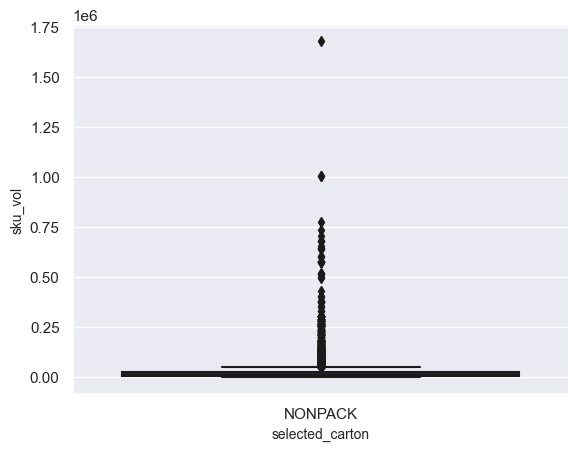

In [769]:
sns.boxplot(x=df[df['selected_carton'] == 'NONPACK']['selected_carton'], y=df[df['selected_carton'] == 'NONPACK']['sku_vol'])

### ITEMS IN ORDER

In [770]:
items_in_order = df.groupby('orderkey')['sku'].count().reset_index()

items_in_order.columns = ['orderkey', 'items']

### CARTON DISTRIBUTION

In [771]:
carton_dist = df['selected_carton'].value_counts().reset_index()

carton_dist.columns = ['cartontype', 'amount']

carton_dist = pd.merge(carton_dist, carton, on='cartontype', how='left')

carton_dist['cart_vol'] = carton_dist[['length', 'width', 'height']].prod(axis=1)

carton_dist

,cartontype,amount,length,width,height,cart_vol
0,MYB,48118,22.0,32.0,4.90,3449.6
1,MYC,39462,30.0,38.0,7.40,8436.0
2,NONPACK,24223,0.0,0.0,0.00,0.0
3,MYD,19143,38.0,50.0,8.20,15580.0
4,MYA,17714,15.0,20.0,3.33,999.0
5,YMC,16351,30.0,20.0,15.00,9000.0
6,YMG,11528,44.7,30.0,20.00,26820.0
7,STRETCH,10870,0.0,0.0,0.00,0.0
8,YMF,10800,35.0,25.0,15.00,13125.0
9,YMA,10483,24.7,15.0,10.00,3705.0


In [772]:
for i in carton_dist['cartontype']:
    print(f'{i} MEDIAN = {df[df["selected_carton"] == i]["sku_vol"].median()}')

MYB MEDIAN = 570.0
MYC MEDIAN = 1359.0
NONPACK MEDIAN = 11573.0
MYD MEDIAN = 2880.0
MYA MEDIAN = 288.0
YMC MEDIAN = 1139.0
YMG MEDIAN = 1886.0
STRETCH MEDIAN = 11805.5
YMF MEDIAN = 1392.0
YMA MEDIAN = 693.0
YMW MEDIAN = 1728.0
MYE MEDIAN = 3888.0
YME MEDIAN = 1980.0
MYF MEDIAN = 395.0
YML MEDIAN = 2448.0
YMX MEDIAN = 3925.0


In [773]:
for i in carton_dist['cartontype']:
    print(f'{i} MEAN = {df[df["selected_carton"] == i]["sku_vol"].mean()}')

MYB MEAN = 1101.2442185350756
MYC MEAN = 2085.402539946911
NONPACK MEAN = 22314.733323271957
MYD MEAN = 3897.552003842254
MYA MEAN = 1004.1589928057554
YMC MEAN = 1693.0222799851467
YMG MEAN = 3465.7932265366535
STRETCH MEAN = 16212.38326074607
YMF MEAN = 2082.5896860986545
YMA MEAN = 1034.605505476398
YMW MEAN = 2869.11790986791
MYE MEAN = 5599.663934426229
YME MEAN = 3875.255069767442
MYF MEAN = 791.4504692387904
YML MEAN = 4822.295159386069
YMX MEAN = 5850.540462427745


# REPLACE NON,STR,YML,YMX TO XXL

Некоторые упаковки имеют большой размер и при этом маленькое процентное появление в таргете - можно попробовать объединить их в группу XXL

In [774]:
df_xxl = df.copy()

In [775]:
df_xxl['selected_carton'] = df_xxl['selected_carton'].replace(['NONPACK', 'STRETCH', 'YML', 'YMX'], 'XXL')
df_xxl['selected_carton'] = df_xxl['selected_carton'].replace('MYF', 'YMA')

In [776]:
df_xxl['selected_carton'].value_counts()

MYB    48118
MYC    39462
XXL    36289
MYD    19143
MYA    17714
YMC    16351
YMG    11528
YMA    11503
YMF    10800
YMW    10377
MYE     7138
YME     5404
Name: selected_carton, dtype: int64

In [777]:
df_xxl

,orderkey,box_num,selected_carton,goods_wght,sku,a,b,c,sku_vol,dim_sum
0,d48f3211c1ffccdc374f23139a9ab668,1,XXL,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,XXL,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6
2,3e646181f6f708edd3326c1626c12d23,1,XXL,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0
3,7047c16a6b7c120162ca3da0ebca43fd,1,XXL,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5
4,097917e584151c0c21f205b2c3aafa10,1,XXL,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3
...,...,...,...,...,...,...,...,...,...,...
233822,8ed0af8473526c54b4b2f99f0060c3ea,1,XXL,1.260,036724225d7ff6f662afcbf909423c30,44.0,13.0,44.0,25168.0,101.0
233823,0e4f34db53e37d6bf171c2e055e2b4e0,1,MYC,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,26.0,20.0,4.0,2080.0,50.0
233824,e71d2e750ce9a7a39c273c634be1665d,1,YMC,0.284,9db21acf9e6c1a66493c246c1461f989,11.4,10.2,30.3,3523.0,51.9
233825,2e2a642f611b5a6f2c404ab945fbc2a3,1,MYB,0.230,4aedb72c5662562524f6119918c7179b,23.0,2.0,12.0,552.0,37.0


# ORDER GROUPPING

Будем считать один заказ = одна сущность

Просуммируем все числовые показатели в датасете и получим общие вес, объем, размеры

In [778]:
grouped_xxl = df_xxl.groupby('orderkey').sum().reset_index()

In [779]:
# Select 'orderkey' and 'selected_carton' columns and group by 'orderkey'
df_single_carton = df_xxl[['orderkey', 'selected_carton']].groupby('orderkey')

# Keep groups where 'selected_carton' has only one unique value
df_single_carton = df_single_carton.filter(lambda x: x['selected_carton'].nunique() == 1)

# Since 'selected_carton' has only one unique value per 'orderkey', we can safely drop duplicates
df_single_carton = df_single_carton.drop_duplicates()

# Convert 'selected_carton' to string
df_single_carton['selected_carton'] = df_single_carton['selected_carton'].astype(str)


df_single_carton

,orderkey,selected_carton
0,d48f3211c1ffccdc374f23139a9ab668,XXL
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,XXL
2,3e646181f6f708edd3326c1626c12d23,XXL
3,7047c16a6b7c120162ca3da0ebca43fd,XXL
4,097917e584151c0c21f205b2c3aafa10,XXL
...,...,...
233822,8ed0af8473526c54b4b2f99f0060c3ea,XXL
233823,0e4f34db53e37d6bf171c2e055e2b4e0,MYC
233824,e71d2e750ce9a7a39c273c634be1665d,YMC
233825,2e2a642f611b5a6f2c404ab945fbc2a3,MYB


In [780]:
grouped_xxl = pd.merge(grouped_xxl, df_single_carton, on='orderkey', how='left')

grouped_xxl

,orderkey,box_num,goods_wght,a,b,c,sku_vol,dim_sum,selected_carton
0,00004fc4755eeb7e851e52ec91130fe4,1,1.000,17.0,38.0,6.0,3876.0,61.0,MYC
1,00008e765c2d85abfa9c97563afd98ef,1,0.135,19.0,3.0,5.0,285.0,27.0,MYB
2,0000c268eb1be1dd5b8c1a032f7318fc,1,0.090,25.0,7.0,17.0,2975.0,49.0,MYC
3,0000fc4c7acac6e89f82392b90e47a27,2,0.400,14.0,12.0,35.0,1416.0,61.0,MYB
4,0001963724fa4cc12d4f025056085633,2,0.456,25.0,29.0,15.0,2475.0,69.0,YMW
...,...,...,...,...,...,...,...,...,...
159893,fffe13683b35336a4c1bb061f479f05b,1,0.016,9.0,1.5,9.0,121.0,19.5,MYA
159894,ffff1e5d7f5b52f28d733ba01a4589b9,1,0.150,25.0,3.0,14.0,1050.0,42.0,MYC
159895,ffff1f0a51126b373f36d7733a5ddb0f,1,0.204,14.8,4.1,21.9,1328.0,40.8,MYC
159896,ffff748210310fffe23e3ade55d26401,1,0.030,5.0,6.0,4.0,120.0,15.0,MYA


In [781]:
grouped_xxl = pd.merge(grouped_xxl, items_in_order, on='orderkey', how='left')

Посчитаем и добавим три колонки:
- максимальное значение размера по одной из сторон в заказе
- сумму по каждой из оставшихся сторон в заказе

In [782]:
df_xxl['item_diag'] = np.sqrt(df_xxl['a']**2 + df_xxl['b']**2 + df_xxl['c']**2)

df_max = df_xxl.groupby('orderkey')[['a', 'b', 'c']].transform('max')
df_sum = df_xxl.groupby('orderkey')[['a', 'b', 'c']].transform('sum')

# Initialize the big columns with sums
df_xxl[['big_a', 'big_b', 'big_c']] = df_sum

# Get the column names of the max values
max_cols = df_max.idxmax(axis=1)

# Update the big_* columns for the rows where the column was the max
df_xxl.loc[max_cols[max_cols == 'a'].index, 'big_a'] = df_max.loc[max_cols[max_cols == 'a'].index, 'a']
df_xxl.loc[max_cols[max_cols == 'b'].index, 'big_b'] = df_max.loc[max_cols[max_cols == 'b'].index, 'b']
df_xxl.loc[max_cols[max_cols == 'c'].index, 'big_c'] = df_max.loc[max_cols[max_cols == 'c'].index, 'c']

In [783]:
df_xxl

,orderkey,box_num,selected_carton,goods_wght,sku,a,b,c,sku_vol,dim_sum,item_diag,big_a,big_b,big_c
0,d48f3211c1ffccdc374f23139a9ab668,1,XXL,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0,33.436507,33.0,18.0,31.0
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,XXL,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6,53.168976,18.6,3.3,49.7
2,3e646181f6f708edd3326c1626c12d23,1,XXL,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0,43.737855,30.0,23.0,22.0
3,7047c16a6b7c120162ca3da0ebca43fd,1,XXL,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5,47.211545,14.0,10.7,43.8
4,097917e584151c0c21f205b2c3aafa10,1,XXL,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3,41.961530,23.4,8.0,33.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233822,8ed0af8473526c54b4b2f99f0060c3ea,1,XXL,1.260,036724225d7ff6f662afcbf909423c30,44.0,13.0,44.0,25168.0,101.0,63.568860,44.0,13.0,44.0
233823,0e4f34db53e37d6bf171c2e055e2b4e0,1,MYC,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,26.0,20.0,4.0,2080.0,50.0,33.045423,26.0,20.0,4.0
233824,e71d2e750ce9a7a39c273c634be1665d,1,YMC,0.284,9db21acf9e6c1a66493c246c1461f989,11.4,10.2,30.3,3523.0,51.9,33.942451,11.4,10.2,30.3
233825,2e2a642f611b5a6f2c404ab945fbc2a3,1,MYB,0.230,4aedb72c5662562524f6119918c7179b,23.0,2.0,12.0,552.0,37.0,26.019224,23.0,2.0,12.0


In [784]:
grouped_xxl = pd.merge(grouped_xxl, df_xxl[['orderkey', 'big_a', 'big_b', 'big_c']], on='orderkey', how='left')

In [785]:
grouped_xxl = grouped_xxl.drop_duplicates().reset_index(drop=True)

In [804]:
grouped_xxl = grouped_xxl.dropna().reset_index(drop=True)

grouped_xxl

,orderkey,box_num,goods_wght,a,b,c,sku_vol,dim_sum,selected_carton,items,big_a,big_b,big_c
0,00004fc4755eeb7e851e52ec91130fe4,1,1.000,17.0,38.0,6.0,3876.0,61.0,MYC,1,17.0,38.0,6.0
1,00008e765c2d85abfa9c97563afd98ef,1,0.135,19.0,3.0,5.0,285.0,27.0,MYB,1,19.0,3.0,5.0
2,0000c268eb1be1dd5b8c1a032f7318fc,1,0.090,25.0,7.0,17.0,2975.0,49.0,MYC,1,25.0,7.0,17.0
3,0000fc4c7acac6e89f82392b90e47a27,2,0.400,14.0,12.0,35.0,1416.0,61.0,MYB,2,14.0,12.0,22.0
4,0001963724fa4cc12d4f025056085633,2,0.456,25.0,29.0,15.0,2475.0,69.0,YMW,2,25.0,17.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156852,fffe13683b35336a4c1bb061f479f05b,1,0.016,9.0,1.5,9.0,121.0,19.5,MYA,1,9.0,1.5,9.0
156853,ffff1e5d7f5b52f28d733ba01a4589b9,1,0.150,25.0,3.0,14.0,1050.0,42.0,MYC,1,25.0,3.0,14.0
156854,ffff1f0a51126b373f36d7733a5ddb0f,1,0.204,14.8,4.1,21.9,1328.0,40.8,MYC,1,14.8,4.1,21.9
156855,ffff748210310fffe23e3ade55d26401,1,0.030,5.0,6.0,4.0,120.0,15.0,MYA,1,5.0,6.0,4.0


# LEARNING & TESTING

In [787]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.metrics import f1_score, accuracy_score

In [788]:
def data_split(data: pd.DataFrame(), target: str):
    try:
        X = data.select_dtypes(include=['float64', 'int64'])
        X.columns = X.columns.astype(str)
        X = X.drop(target,axis=1)
        y = data[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.25, 
                                                        random_state=RANDOM,
                                                        stratify=y,
                                                        shuffle=True)
        return X_train, X_test, y_train, y_test
    except:
        X = data.select_dtypes(include=['float64', 'int64'])
        X.columns = X.columns.astype(str)
        y = data[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.25, 
                                                        random_state=RANDOM,
                                                        stratify=y,
                                                        shuffle=True)
        return X_train, X_test, y_train, y_test


### XXL MODEL

Была мысль сначала классифицировать эти OVRESIZED упаковки (XXL)

И подавать для дальнейшего обучения датасет с остаточным датасетом, но не точность такой классификационной модели приводит к лишнему шуму в данных и ухудшает качество последующих моделей.

In [803]:
tt = grouped_xxl.copy()
tt['XXL'] = tt['selected_carton'].apply(lambda x: 1 if x == 'XXL' else 0)


In [ ]:
X_train_XXL, X_test_XXL, y_train_XXL, y_test_XXL = data_split(tt, 'XXL')

In [ ]:
ada = ADASYN(random_state=RANDOM, sampling_strategy='minority')

X_train_XXL_res, y_train_XXL_res = ada.fit_resample(X_train_XXL, y_train_XXL)

In [ ]:
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('RF', RandomForestClassifier(n_jobs=-1))
])


rf_pipe.fit(X_train_XXL_res, y_train_XXL_res)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(n_jobs=-1))]),
             param_grid={}, verbose=1)

In [ ]:
rf_preds = rf_pipe.predict(X_test_XXL)

print(classification_report(y_test_XXL, rf_preds))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     48156
           1       0.69      0.87      0.77      7908

    accuracy                           0.93     56064
   macro avg       0.83      0.90      0.86     56064
weighted avg       0.94      0.93      0.93     56064



In [ ]:
pp = grouped_xxl.copy()
pp['XXL_preds'] = pipe.predict(pp.drop(['orderkey', 'selected_carton'], axis=1))

pp

,orderkey,box_num,selected_carton,dim_sum,items,total_wght,item_diag,big_a,big_b,big_c,sum_sku_vol,XXL_preds
0,d48f3211c1ffccdc374f23139a9ab668,1,XXL,48.0,3,0.300,33.436507,33.0,18.0,31.0,6138.0,1
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,XXL,71.6,1,0.896,53.168976,18.6,3.3,49.7,3050.0,1
2,3e646181f6f708edd3326c1626c12d23,1,XXL,75.0,1,4.400,43.737855,30.0,23.0,22.0,15180.0,1
3,7047c16a6b7c120162ca3da0ebca43fd,1,XXL,68.5,1,0.700,47.211545,14.0,10.7,43.8,6561.0,1
4,097917e584151c0c21f205b2c3aafa10,1,XXL,65.3,1,2.078,41.961530,23.4,8.0,33.9,6346.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
224250,8ed0af8473526c54b4b2f99f0060c3ea,1,XXL,101.0,1,1.260,63.568860,44.0,13.0,44.0,25168.0,1
224251,0e4f34db53e37d6bf171c2e055e2b4e0,1,MYC,50.0,1,0.100,33.045423,26.0,20.0,4.0,2080.0,0
224252,e71d2e750ce9a7a39c273c634be1665d,1,YMC,51.9,1,0.284,33.942451,11.4,10.2,30.3,3523.0,0
224253,2e2a642f611b5a6f2c404ab945fbc2a3,1,MYB,37.0,1,0.230,26.019224,23.0,2.0,12.0,552.0,0


In [ ]:
print(classification_report(tt['XXL'], pp['XXL_preds']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    192622
           1       0.82      0.94      0.88     31633

    accuracy                           0.96    224255
   macro avg       0.91      0.95      0.93    224255
weighted avg       0.97      0.96      0.96    224255



In [ ]:
pp = pp.query('XXL_preds == 0')

# FINAL TESTING

В данных/сущностях есть основная проблема - как моделе дать понять, что товаров несколько? Как не дать ей запутаться между одинаковыми товарами с разным таргетом, если товар был не единственный в заказе?

Добавление таких фичей, как общий размер, объем, вес, габариты - не облегчило ситуацию

Было принято решение, для начала, решить задачу для сущностей (заказов) с одним товаром

In [790]:
X_train, X_test, y_train, y_test = data_split(grouped_xxl, 'selected_carton')
X_train_one, X_test_one, y_train_one, y_test_one = data_split(grouped_xxl.query('items == 1'), 'selected_carton')

In [791]:
ada = ADASYN(random_state=RANDOM, sampling_strategy='minority')

X_train_res, y_train_res = ada.fit_resample(X_train, y_train)
X_train_one_res, y_train_one_res = ada.fit_resample(X_train_one, y_train_one)

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
category_mapping = {
    'MYB': 0, 
    'MYC': 1, 
    'XXL': 2, 
    'MYD': 3, 
    'MYA': 4, 
    'YMC': 5, 
    'YMG': 6, 
    'YMA': 7, 
    'YMF': 8, 
    'YMW': 9,
    'MYE': 10, 
    'YME': 11
}

df_xxl_xgb = grouped_xxl.copy()
df_xxl_xgb['selected_carton'] = df_xxl_xgb['selected_carton'].map(category_mapping)

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = data_split(df_xxl_xgb, 'selected_carton')


In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train_xgb)

xgb = XGBClassifier(
                    objective='multi:softmax', 
                    num_class=12, 
                    missing=1,
                    gamma=0, 
                    learning_rate=0.1,
                    max_depth=5, 
                    reg_lambda=1, 
                    early_stopping_rounds=10,
                    eval_metric=['merror','mlogloss'],
                    seed=RANDOM
                )

xgb.fit(X_train_xgb, y_train_xgb, eval_set=[(X_train_xgb, y_train_xgb), (X_test_xgb, y_test_xgb)], sample_weight=sample_weights)

[0]	validation_0-merror:0.60350	validation_0-mlogloss:2.36718	validation_1-merror:0.60569	validation_1-mlogloss:2.36808
[1]	validation_0-merror:0.59763	validation_0-mlogloss:2.27961	validation_1-merror:0.59827	validation_1-mlogloss:2.28135
[2]	validation_0-merror:0.59044	validation_0-mlogloss:2.20901	validation_1-merror:0.59199	validation_1-mlogloss:2.21136
[3]	validation_0-merror:0.58811	validation_0-mlogloss:2.14977	validation_1-merror:0.58954	validation_1-mlogloss:2.15264
[4]	validation_0-merror:0.58543	validation_0-mlogloss:2.09919	validation_1-merror:0.58860	validation_1-mlogloss:2.10261
[5]	validation_0-merror:0.58064	validation_0-mlogloss:2.05504	validation_1-merror:0.58383	validation_1-mlogloss:2.05885
[6]	validation_0-merror:0.58197	validation_0-mlogloss:2.01675	validation_1-merror:0.58518	validation_1-mlogloss:2.02106
[7]	validation_0-merror:0.58162	validation_0-mlogloss:1.98259	validation_1-merror:0.58312	validation_1-mlogloss:1.98741
[8]	validation_0-merror:0.58033	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=1,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=12, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test_xgb)


print(classification_report(y_test_xgb, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.63      0.36      0.46     10202
           1       0.52      0.32      0.40      7443
           2       0.88      0.70      0.78      6439
           3       0.34      0.40      0.37      3269
           4       0.42      0.71      0.53      3836
           5       0.25      0.30      0.27      1976
           6       0.28      0.28      0.28       861
           7       0.18      0.49      0.27      1896
           8       0.21      0.28      0.24      1017
           9       0.25      0.15      0.19       917
          10       0.18      0.41      0.25      1074
          11       0.16      0.36      0.22       285

    accuracy                           0.44     39215
   macro avg       0.36      0.40      0.35     39215
weighted avg       0.52      0.44      0.46     39215



## CATBOOST

In [794]:
from catboost import CatBoostClassifier

In [43]:
cb_parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  #'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }

cb = CatBoostClassifier(
        #learning_rate=0.01, 
        leaf_estimation_method='Gradient',
        #n_estimators=1000,
        subsample=0.8,
        #max_depth=4,
        verbose=100,
        #l2_leaf_reg = 7,
        bootstrap_type="Bernoulli",
        #class_weights='Balanced'
        loss_function='MultiClass',
        eval_metric='TotalF1',
        task_type="GPU")

cb_search = GridSearchCV(cb, cb_parameters, cv=2)

cb_search.fit(X_train_one_res, y_train_one_res)

0:	learn: 0.4471185	total: 7.72ms	remaining: 7.71s
100:	learn: 0.4303012	total: 433ms	remaining: 3.86s
200:	learn: 0.4418465	total: 837ms	remaining: 3.33s
300:	learn: 0.4773890	total: 1.23s	remaining: 2.86s
400:	learn: 0.4899106	total: 1.62s	remaining: 2.42s
500:	learn: 0.4977641	total: 2s	remaining: 1.99s
600:	learn: 0.5033961	total: 2.38s	remaining: 1.58s
700:	learn: 0.5074803	total: 2.79s	remaining: 1.19s
800:	learn: 0.5107364	total: 3.21s	remaining: 798ms
900:	learn: 0.5138854	total: 3.63s	remaining: 399ms
999:	learn: 0.5172892	total: 4.05s	remaining: 0us
0:	learn: 0.4147890	total: 4.81ms	remaining: 4.81s
100:	learn: 0.4157373	total: 379ms	remaining: 3.37s
200:	learn: 0.4233474	total: 775ms	remaining: 3.08s
300:	learn: 0.4319477	total: 1.18s	remaining: 2.75s
400:	learn: 0.4710750	total: 1.59s	remaining: 2.38s
500:	learn: 0.4834568	total: 1.99s	remaining: 1.98s
600:	learn: 0.4924696	total: 2.39s	remaining: 1.59s
700:	learn: 0.4984028	total: 2.8s	remaining: 1.2s
800:	learn: 0.5032752

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f8137be6860>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [44]:
cb_search.best_params_

{'depth': 10, 'learning_rate': 0.04}

In [45]:
cb_search.best_score_

0.6125162072507451

In [48]:
cb_best = CatBoostClassifier(
        learning_rate=0.04, 
        leaf_estimation_method='Gradient',
        subsample=0.8,
        verbose=100,
        bootstrap_type="Bernoulli",
        loss_function='MultiClass',
        eval_metric='TotalF1',
        task_type="GPU",
        depth = 10, 
        )

cb_best.fit(X_train_one_res, y_train_one_res)

0:	learn: 0.4763556	total: 42.3ms	remaining: 42.2s
100:	learn: 0.5384816	total: 3.07s	remaining: 27.3s
200:	learn: 0.5707310	total: 6.14s	remaining: 24.4s
300:	learn: 0.5910821	total: 9.24s	remaining: 21.5s
400:	learn: 0.6051332	total: 12.3s	remaining: 18.4s
500:	learn: 0.6173710	total: 15.4s	remaining: 15.3s
600:	learn: 0.6266436	total: 18.5s	remaining: 12.3s
700:	learn: 0.6351087	total: 21.6s	remaining: 9.21s
800:	learn: 0.6422676	total: 24.7s	remaining: 6.13s
900:	learn: 0.6479979	total: 27.8s	remaining: 3.05s
999:	learn: 0.6534755	total: 30.8s	remaining: 0us


In [49]:
f_imp = pd.DataFrame(X_train_res.columns, index=cb_best.feature_importances_, columns=['features'])

f_imp.sort_index(ascending=False)

,features
22.902509,goods_wght
19.006140,dim_sum
14.343314,sku_vol
13.183852,b
13.176835,c
12.050513,a
1.729979,big_c
1.723883,big_b
1.703342,big_a
0.179633,box_num


In [50]:
preds = cb_best.predict(X_test_one)

In [51]:
print(classification_report(y_test_one, preds))

              precision    recall  f1-score   support

         MYA       0.54      0.44      0.48      3503
         MYB       0.56      0.72      0.63      8982
         MYC       0.51      0.52      0.51      5975
         MYD       0.43      0.38      0.41      2485
         MYE       0.36      0.08      0.13       760
         XXL       0.80      0.80      0.80      5560
         YMA       0.51      0.13      0.21      1285
         YMC       0.53      0.12      0.20       971
         YME       0.03      0.48      0.05        90
         YMF       0.57      0.06      0.10       370
         YMG       0.00      0.00      0.00       341
         YMW       0.55      0.03      0.06       355

    accuracy                           0.55     30677
   macro avg       0.45      0.31      0.30     30677
weighted avg       0.56      0.55      0.54     30677



**Вывод**
- Лучший результат показал CatBoost

SKU_GROUPS

In [ ]:
sku_groups = sku_cargotypes.groupby('sku')['cargotype'].apply(list).reset_index()

sku_groups

,sku,cargotype
0,0000060b72e5a5d67ee3c37ceab6b72a,"[290, 671, 950]"
1,00000c9eb5ba2364380ab2e3bf870c23,"[290, 440, 441, 460, 480, 690]"
2,000010b2dda4921d4982818e241847bf,"[290, 440, 441, 480, 490, 690]"
3,00001196fe633174323cb69c4ad05ecb,[290]
4,000015d94c63b8dbac214ad23bb8bb20,"[200, 290, 310]"
...,...,...
6333553,fffff2488130fbfe2b745cb64e6d84e5,[290]
6333554,fffff25cc8ab438e5aca4771f8598127,[292]
6333555,fffff28457b273fb763743e31b358cd0,[290]
6333556,fffffad1729c45c5eba6e185ec31045d,"[200, 292, 300, 301, 350, 641, 692]"
